# E-SHOP CLOTHING 2008
***DATA UNDERSTANDING***

Prediksi terhadap e-store website untuk mengetahui harga pakaian yang diatas harga rata-rata berdasarkan variable-variable penentunya.

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# LOADING LIBRARIES AND DATA SET

In [2]:
import numpy as np #Mengolah matrix
import pandas as pd #Read structured data
import matplotlib.pyplot as plt #Data plot visualization
import seaborn as sns

#Machine Learning
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler  #Feature Scaling
from sklearn.model_selection import train_test_split #Data Partition
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from xgboost import plot_importance

#ensembling
from sklearn.ensemble import VotingClassifier

Dataset yang akan saya gunakan yaitu data mengenai e-shop website pada tahun 2008 berisikan tanggal, model pakaian, negara, dan lain-lain yang saya unduh langsung pada kaggle https://www.kaggle.com/adityawisnugrahas/eshop-clothing-dataset

In [3]:
eshop = pd.read_csv('../input/eshop-clothing-dataset/e-shop clothing 2008.csv', delimiter=',')

# EXPLORATORY AND VISUAIZATION DATA ANALISYS

In [4]:
eshop.shape

(165474, 14)

***DATA DESCRIPTIONS***

Independent Variables (x):
1. year : (2008)

2. month : from April (4) to August (8)

3. day : day number of the month

4. order : sequence of clicks during one session

5. country : 

1-Australia
2-Austria
3-Belgium
4-British Virgin Islands
5-Cayman Islands
6-Christmas Island
7-Croatia
8-Cyprus
9-Czech Republic
10-Denmark
11-Estonia
12-unidentified
13-Faroe Islands
14-Finland
15-France
16-Germany
17-Greece
18-Hungary
19-Iceland
20-India
21-Ireland
22-Italy
23-Latvia
24-Lithuania
25-Luxembourg
26-Mexico
27-Netherlands
28-Norway
29-Poland
30-Portugal
31-Romania
32-Russia
33-San Marino
34-Slovakia
35-Slovenia
36-Spain
37-Sweden
38-Switzerland
39-Ukraine
40-United Arab Emirates
41-United Kingdom
42-USA
43-biz (.biz) 44-com (.com)
45-int (.int) 46-net (.net)
47-org (*.org)

6. session ID :

7. page 1 (main category) : 

1-trousers 

2-skirts

3-blouses

4-sale 

8. page 2 (clothing model 1) : contains information about the code for each product (217 products)

9. colour : 

1-beige

2-black

3-blue

4-brown

5-burgundy

6-gray

7-green

8-navy blue

9-of many colors

10-olive

11-pink

12-red

13-violet

14-white

10. location : 

1-top left

2-top in the middle

3-top right

4-bottom left

5-bottom in the middle

6-bottom right

11. model photography : 1-en face, 2-profile

12. price : price in US dollars

13. page : page number within the e-store website (from 1 to 5)



Dependent Variable (y):

14. target : price 2 (1-yes, 2-no)

In [5]:
eshop

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [6]:
# filter vriable page
page = eshop[(eshop['page']==2)]
page

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
9,2008,4,1,1,29,2,2,B31,9,5,1,57,1,2
10,2008,4,1,2,29,2,2,B21,12,1,1,67,1,2
11,2008,4,1,3,29,2,2,B24,11,2,1,57,1,2
12,2008,4,1,4,29,2,2,B27,2,3,1,57,1,2
15,2008,4,1,7,29,2,2,B27,2,3,1,57,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165429,2008,8,13,25,29,24018,4,P23,6,2,2,28,2,2
165446,2008,8,13,15,29,24019,4,P27,6,3,2,33,2,2
165450,2008,8,13,2,29,24020,3,C35,9,6,1,50,1,2
165452,2008,8,13,4,29,24020,2,B26,13,3,1,57,1,2


In [7]:
# filter vriable page
page3 = eshop[(eshop['page']==3)]
page3

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
26,2008,4,1,2,21,4,1,A37,2,1,1,62,1,3
32,2008,4,1,3,9,6,3,C53,14,6,1,38,2,3
40,2008,4,1,6,29,7,4,P48,9,4,2,33,2,3
41,2008,4,1,7,29,7,4,P50,6,5,2,33,2,3
42,2008,4,1,8,29,7,4,P42,6,2,2,28,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165380,2008,8,13,56,29,24012,4,P41,9,2,2,43,1,3
165394,2008,8,13,7,29,24014,4,P48,9,4,2,33,2,3
165401,2008,8,13,3,44,24015,3,C40,14,2,2,28,2,3
165404,2008,8,13,2,29,24017,4,P50,6,5,2,33,2,3


In [8]:
harga_no = eshop[(eshop['price 2']==2)]
harga_no

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
6,2008,4,1,7,29,1,3,C57,5,1,2,33,2,4
13,2008,4,1,5,29,2,1,A10,3,4,1,38,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165463,2008,8,13,2,29,24023,1,A18,4,6,1,38,2,1
165464,2008,8,13,3,29,24023,1,A15,14,5,2,33,2,1
165465,2008,8,13,4,29,24023,1,A16,1,6,1,33,2,1
165467,2008,8,13,6,29,24023,4,P18,2,6,1,28,2,1


In [9]:
harga_yes = eshop[(eshop['price 2']==1)]
harga_yes

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
5,2008,4,1,6,29,1,3,C56,6,1,2,57,1,4
7,2008,4,1,8,29,1,4,P67,9,5,1,38,1,4
8,2008,4,1,9,29,1,4,P82,6,4,2,48,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165468,2008,8,13,7,29,24023,4,P13,4,5,1,38,1,1
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [10]:
numerik= eshop.select_dtypes(exclude='O')
baju = eshop.select_dtypes(include='O')

In [11]:
baju.columns

Index(['page 2 (clothing model)'], dtype='object')

In [12]:
# encoding for categorical data
from sklearn.preprocessing import OrdinalEncoder

In [13]:
oe = OrdinalEncoder()
enkode = oe.fit_transform(baju)
enkode

array([[ 4.],
       [ 7.],
       [70.],
       ...,
       [11.],
       [87.],
       [53.]])

In [14]:
dat_cat = pd.DataFrame(enkode,columns=baju.columns).astype('int')
dat_cat

,page 2 (clothing model)
0,4
1,7
2,70
3,51
4,74
...,...
165469,44
165470,2
165471,11
165472,87


In [15]:
# reconstruct data
eshop2 = pd.concat([numerik,dat_cat],axis=1)
eshop2

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page,page 2 (clothing model)
0,2008,4,1,1,29,1,1,1,5,1,28,2,1,4
1,2008,4,1,2,29,1,1,1,6,1,33,2,1,7
2,2008,4,1,3,29,1,2,10,2,1,52,1,1,70
3,2008,4,1,4,29,1,2,6,6,2,38,2,1,51
4,2008,4,1,5,29,1,2,4,3,2,52,1,1,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,2,4,1,67,1,1,44
165470,2008,8,13,1,9,24025,1,3,4,1,62,1,1,2
165471,2008,8,13,1,34,24026,1,3,1,1,43,2,1,11
165472,2008,8,13,2,34,24026,3,12,1,1,43,1,1,87


In [16]:
harga_yes2 = eshop2[(eshop2['price 2']==1)]
harga_yes2

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page,page 2 (clothing model)
2,2008,4,1,3,29,1,2,10,2,1,52,1,1,70
4,2008,4,1,5,29,1,2,4,3,2,52,1,1,74
5,2008,4,1,6,29,1,3,6,1,2,57,1,4,127
7,2008,4,1,8,29,1,4,9,5,1,38,1,4,198
8,2008,4,1,9,29,1,4,6,4,2,48,1,5,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165468,2008,8,13,7,29,24023,4,4,5,1,38,1,1,139
165469,2008,8,13,1,29,24024,2,2,4,1,67,1,1,44
165470,2008,8,13,1,9,24025,1,3,4,1,62,1,1,2
165472,2008,8,13,2,34,24026,3,12,1,1,43,1,1,87


In [17]:
harga_no2 = eshop2[(eshop2['price 2']==2)]
harga_no2

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page,page 2 (clothing model)
0,2008,4,1,1,29,1,1,1,5,1,28,2,1,4
1,2008,4,1,2,29,1,1,1,6,1,33,2,1,7
3,2008,4,1,4,29,1,2,6,6,2,38,2,1,51
6,2008,4,1,7,29,1,3,5,1,2,33,2,4,128
13,2008,4,1,5,29,2,1,3,4,1,38,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165463,2008,8,13,2,29,24023,1,4,6,1,38,2,1,9
165464,2008,8,13,3,29,24023,1,14,5,2,33,2,1,6
165465,2008,8,13,4,29,24023,1,1,6,1,33,2,1,7
165467,2008,8,13,6,29,24023,4,2,6,1,28,2,1,144


In [18]:
beige = eshop2[(eshop2['colour']==1)]
beige

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page,page 2 (clothing model)
0,2008,4,1,1,29,1,1,1,5,1,28,2,1,4
1,2008,4,1,2,29,1,1,1,6,1,33,2,1,7
85,2008,4,1,11,21,15,2,1,3,1,48,2,1,75
100,2008,4,1,1,29,16,4,1,3,2,28,2,4,192
167,2008,4,1,2,29,30,2,1,3,1,48,2,1,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165281,2008,8,13,6,29,24007,1,1,5,1,28,2,1,4
165414,2008,8,13,10,29,24018,1,1,6,1,33,2,1,7
165430,2008,8,13,26,29,24018,4,1,3,2,28,2,4,192
165460,2008,8,13,2,29,24022,1,1,5,1,28,2,1,4


Mengidentifikasi tipe data dan keberadaan nilai yang hilang

In [19]:
eshop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   year                     165474 non-null  int64
 1   month                    165474 non-null  int64
 2   day                      165474 non-null  int64
 3   order                    165474 non-null  int64
 4   country                  165474 non-null  int64
 5   session ID               165474 non-null  int64
 6   page 1 (main category)   165474 non-null  int64
 7   colour                   165474 non-null  int64
 8   location                 165474 non-null  int64
 9   model photography        165474 non-null  int64
 10  price                    165474 non-null  int64
 11  price 2                  165474 non-null  int64
 12  page                     165474 non-null  int64
 13  page 2 (clothing model)  165474 non-null  int64
dtypes: int64(14)
memory usage: 17.7 MB


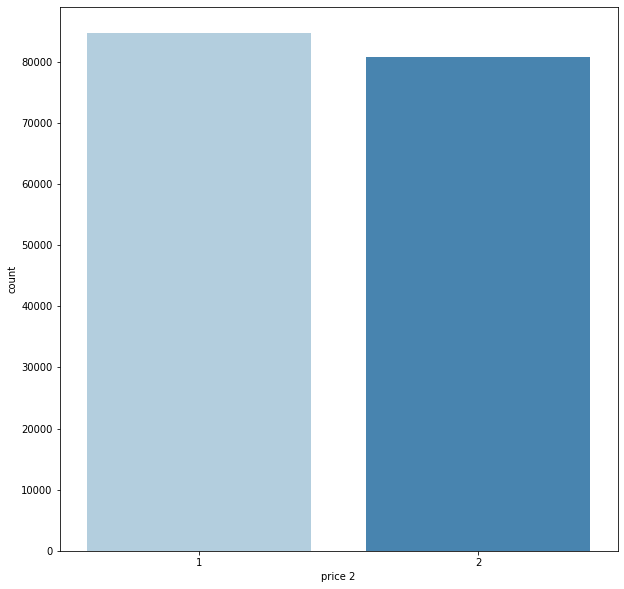

In [20]:
cols= ["#C2C4E2","#EED4E5"]
plt.figure(figsize=(10,10))
sns.countplot(x= eshop2['price 2'], palette = 'Blues')

plt.show()

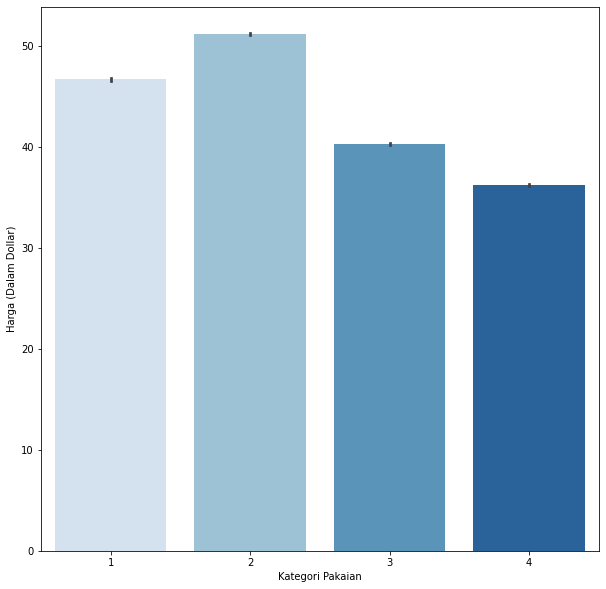

In [21]:
cols= ["#C2C4E2","#EED4E5"]
plt.figure(figsize=(10,10))
sns.barplot(x= eshop2['page 1 (main category)'], y= eshop2['price'],palette = 'Blues')
plt.xlabel('Kategori Pakaian')
plt.ylabel('Harga (Dalam Dollar)')
plt.show()

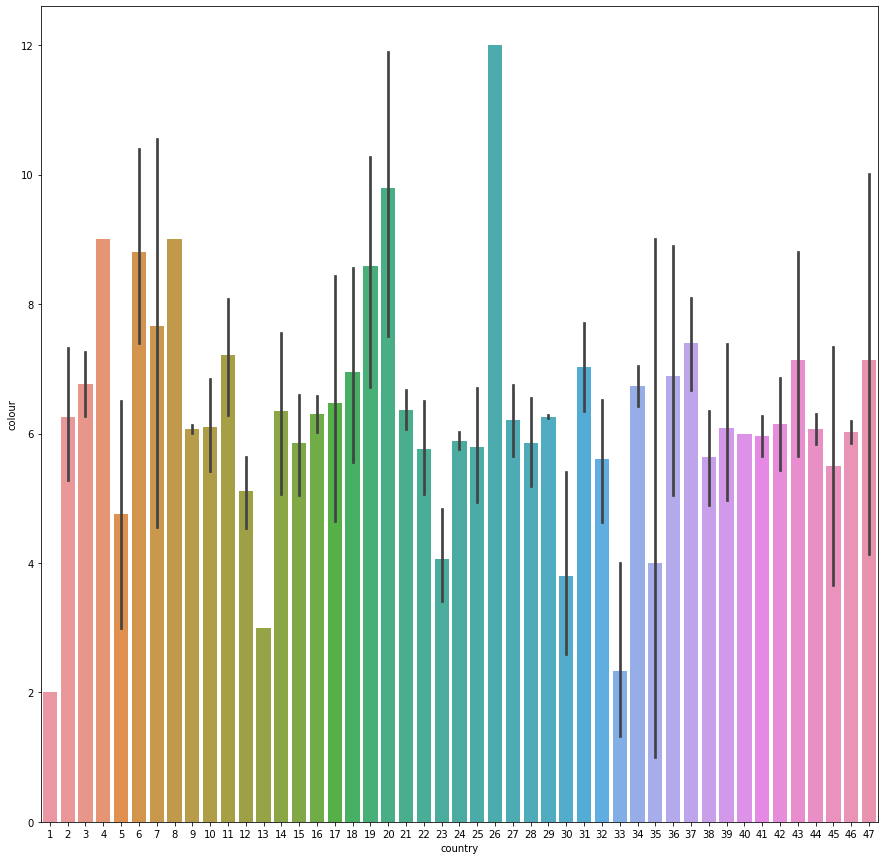

In [22]:
plt.figure(figsize=(15,15))
sns.barplot(x=eshop2['country'],y=eshop2['colour'])
plt.show()

Plot warna pakaian beige paling banyak di negara mana?

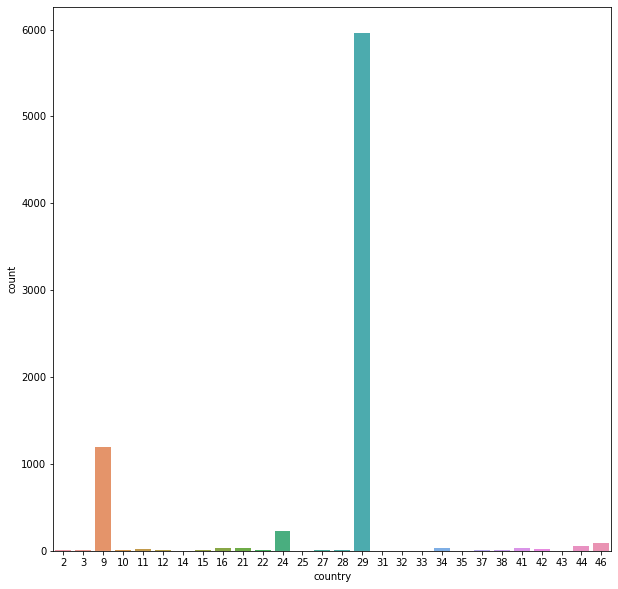

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(x=beige['country'])
plt.show()

Negara Polandia adalah negara yang paling banyak membeli pakaian berwarna beige

In [24]:
corr = eshop2.corr(method = 'pearson')

<AxesSubplot:title={'center':'Person Correlation of Features'}>

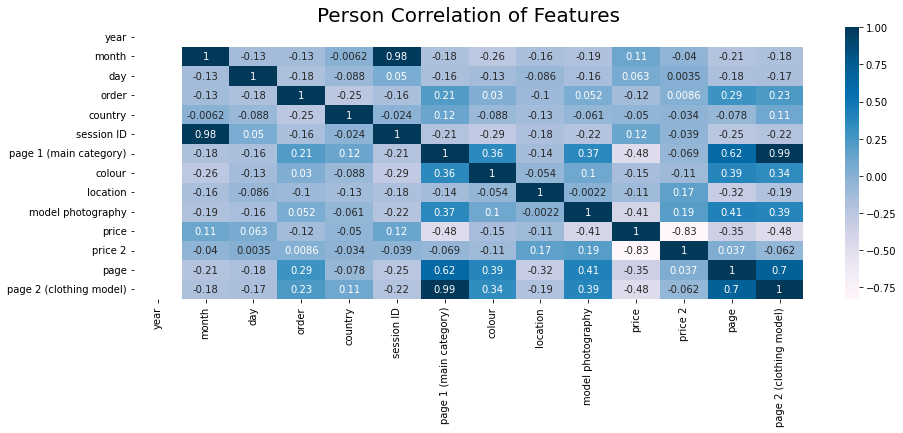

In [25]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(15,5)) 
plt.title("Person Correlation of Features", y = 1, size = 20) 
sns.heatmap(corr.astype(float).corr(), linecolor = "white", cmap = colormap, annot = True)

>Dari tabel korelasi dapat dilihat bahwa age mempunyai hubungan linear positif yang sangat kuat dengan target jika dibandingkan yang lain. Nilai korelasi variabel lain hampir mendekati nol yang menandakan bahwa variable2 tersebut kurang berpengaruh terhadap nilai target.

# DATA PREPARATION

Missing Value Checking

In [26]:
eshop2.isnull().sum()

year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
page 2 (clothing model)    0
dtype: int64

Fill Missing Values

-> Dataset hasn't any missing value.

Langkah selanjutnya adalah memperoleh pengetahuan tentang statistik ringkasan data dasar menggunakan metode .describe(), yang menghitung nilai count, mean, standar deviasi, minimum, maksimum dan persentil (25, 50 dan 75). Ini membantu kita mendeteksi anomali apa pun dalam kumpulan data kita. Seperti variabel dengan varians tinggi atau data yang sangat miring.

In [27]:
eshop.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


Outlier Finding

<AxesSubplot:xlabel='day'>

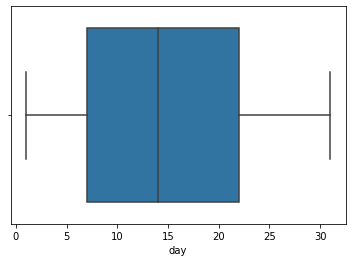

In [28]:
sns.boxplot(eshop2["day"])

<AxesSubplot:xlabel='session ID'>

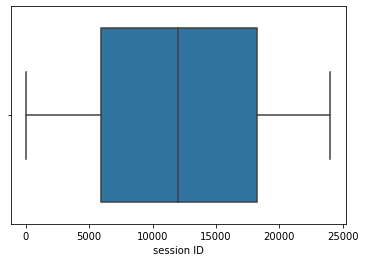

In [29]:
sns.boxplot(eshop2["session ID"])

<AxesSubplot:xlabel='page 1 (main category)'>

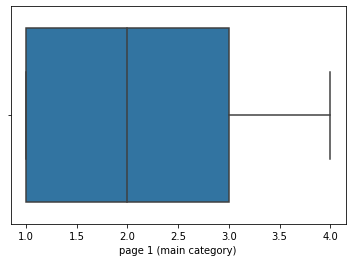

In [30]:
sns.boxplot(eshop2["page 1 (main category)"])

<AxesSubplot:xlabel='page 2 (clothing model)'>

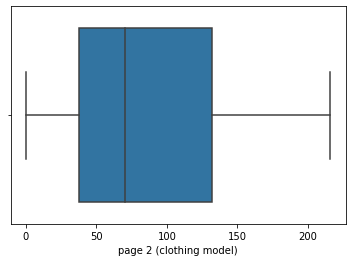

In [31]:
sns.boxplot(eshop2["page 2 (clothing model)"])

<AxesSubplot:xlabel='colour'>

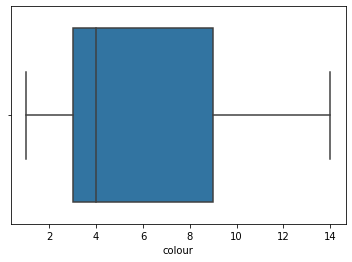

In [32]:
sns.boxplot(eshop2["colour"])

<AxesSubplot:xlabel='price'>

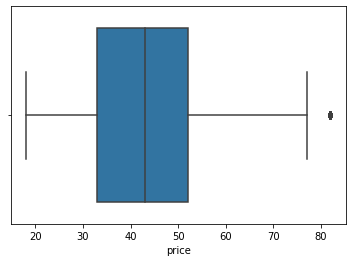

In [33]:
sns.boxplot(eshop2["price"])

<AxesSubplot:xlabel='page'>

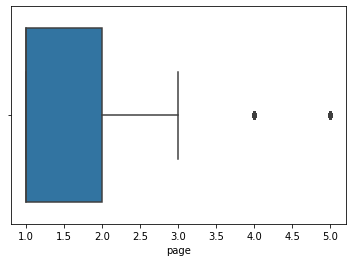

In [34]:
sns.boxplot(eshop2["page"])

Outlier Fixing (price, page)

-> price

In [35]:
#Data 'price' diisi dengan median
fill=eshop2["price"].median()
eshop2["price"]=eshop2["price"].fillna(fill)

In [36]:
#lihat outlier observasi pada variabel 'price'
Q1 =eshop2["price"].quantile(0.25)
Q3 =eshop2["price"].quantile(0.75)    
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
eshop2.loc[(eshop2["price"]>upper_range),:]

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page,page 2 (clothing model)
115,2008,4,1,7,9,18,1,3,3,1,82,1,1,42
237,2008,4,1,3,9,40,1,3,3,1,82,1,1,42
321,2008,4,1,31,9,49,1,3,3,1,82,1,1,42
380,2008,4,1,5,29,58,1,3,3,1,82,1,1,42
426,2008,4,1,4,24,67,1,3,3,1,82,1,1,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165133,2008,8,12,4,29,23993,1,3,3,1,82,1,1,42
165134,2008,8,12,5,29,23993,1,3,3,1,82,1,1,42
165214,2008,8,12,38,34,23999,1,3,3,1,82,1,1,42
165290,2008,8,13,1,29,24009,1,3,3,1,82,1,1,42


In [37]:
#Ganti outlier observations dengan upper bound dan lower bound
eshop2.loc[(eshop2["price"]>upper_range),"price"]=upper_range

<AxesSubplot:xlabel='price'>

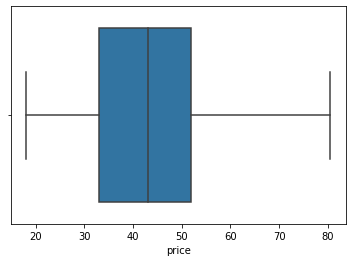

In [38]:
sns.boxplot(eshop2["price"])

-> page

In [39]:
#Data 'page' diisi dengan median
fill=eshop2["page"].median()
eshop2["page"]=eshop2["page"].fillna(fill)

In [40]:
#lihat outlier observasi pada variabel 'page'
Q1 =eshop2["page"].quantile(0.25)
Q3 =eshop2["page"].quantile(0.75)    
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
eshop2.loc[(eshop2["page"]>upper_range),:]

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page,page 2 (clothing model)
5,2008,4,1,6,29,1,3,6,1,2,57.0,1,4,127
6,2008,4,1,7,29,1,3,5,1,2,33.0,2,4,128
7,2008,4,1,8,29,1,4,9,5,1,38.0,1,4,198
8,2008,4,1,9,29,1,4,6,4,2,48.0,1,5,215
24,2008,4,1,6,21,3,4,7,2,1,43.0,1,5,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165397,2008,8,13,10,29,24014,4,7,2,1,43.0,1,5,209
165398,2008,8,13,11,29,24014,3,6,1,2,57.0,1,4,127
165430,2008,8,13,26,29,24018,4,1,3,2,28.0,2,4,192
165431,2008,8,13,27,29,24018,4,6,4,2,48.0,1,5,215


In [41]:
#Ganti outlier observations dengan upper bound dan lower bound
eshop2.loc[(eshop2["page"]>upper_range),"page"]=upper_range

<AxesSubplot:xlabel='page'>

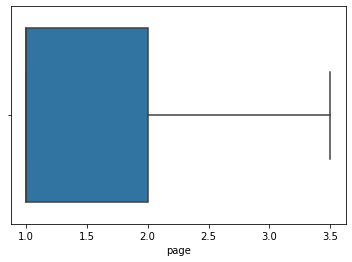

In [42]:
sns.boxplot(eshop2["page"])

Finding Duplicate Data

In [43]:
eshop2.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
165469    False
165470    False
165471    False
165472    False
165473    False
Length: 165474, dtype: bool

>Sebelum menerapkan algoritma kita harus memeriksa apakah data dibagi rata atau tidak, karena jika data tidak dibagi rata akan menyebabkan masalah ketidakseimbangan data

Train and Test Split

Seluruh kumpulan data umumnya dibagi menjadi 80% train dan 20% kumpulan data uji (aturan umum). Data latih 80% digunakan untuk pelatihan model, sedangkan 20% sisanya digunakan untuk memeriksa bagaimana model digeneralisasikan pada kumpulan data yang tidak terlihat.

In [44]:

y = eshop2["price 2"]
X = eshop2.drop('price 2',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.20, random_state = 0)

Normalization / Feature Scaling

Membuat tiap fitur memiliki nilai rata-rata 0 dan variansi 1.

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#https://www.megabagus.id/feature-scaling/

# MODEL FITTING

Di sini saya mengambil Algoritma Machine Learning yang berbeda dan mencoba menemukan algoritma yang memprediksi secara akurat.

>1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. K-Nearest Neighbour
5. Decision Tree
6. Support Vector Machine

In [46]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[67604   232]
 [    0 64544]]


Accuracy of Logistic Regression: 99.82474694062547 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     67836
           2       1.00      1.00      1.00     64544

    accuracy                           1.00    132380
   macro avg       1.00      1.00      1.00    132380
weighted avg       1.00      1.00      1.00    132380



In [47]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[58561  9275]
 [ 2570 61974]]


Accuracy of Naive Bayes model: 91.05227375736517 

              precision    recall  f1-score   support

           1       0.96      0.86      0.91     67836
           2       0.87      0.96      0.91     64544

    accuracy                           0.91    132380
   macro avg       0.91      0.91      0.91    132380
weighted avg       0.91      0.91      0.91    132380



In [48]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[67836     0]
 [  356 64188]]


Accuracy of Random Forest: 99.73107720199425 

              precision    recall  f1-score   support

           1       0.99      1.00      1.00     67836
           2       1.00      0.99      1.00     64544

    accuracy                           1.00    132380
   macro avg       1.00      1.00      1.00    132380
weighted avg       1.00      1.00      1.00    132380



In [49]:
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[67340   496]
 [  938 63606]]


Accuracy of K-NeighborsClassifier: 98.91675479679711 

              precision    recall  f1-score   support

           1       0.99      0.99      0.99     67836
           2       0.99      0.99      0.99     64544

    accuracy                           0.99    132380
   macro avg       0.99      0.99      0.99    132380
weighted avg       0.99      0.99      0.99    132380



In [50]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[67836     0]
 [    0 64544]]


Accuracy of DecisionTreeClassifier: 100.0 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     67836
           2       1.00      1.00      1.00     64544

    accuracy                           1.00    132380
   macro avg       1.00      1.00      1.00    132380
weighted avg       1.00      1.00      1.00    132380



In [51]:
m6 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[67812    24]
 [   16 64528]]


Accuracy of Support Vector Classifier: 99.96978395528025 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     67836
           2       1.00      1.00      1.00     64544

    accuracy                           1.00    132380
   macro avg       1.00      1.00      1.00    132380
weighted avg       1.00      1.00      1.00    132380



In [52]:
model = XGBClassifier()
masuk = model.fit(X,y)
print(model.feature_importances_)

[13:47:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.8601277e-06 2.1906088e-01 2.3169238e-02 3.8599714e-03 0.0000000e+00
 7.5371683e-01 7.1177428e-06 1.8416083e-04]


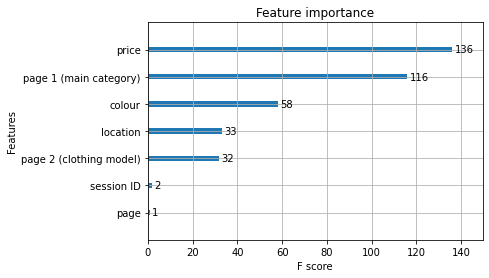

In [53]:
plot_importance(model)
plt.show()

# MODEL EVALUATION

In [54]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,99.824747
1,Naive Bayes,91.052274
2,Random Forest,99.731077
3,K-Nearest Neighbour,98.916755
4,Decision Tree,100.000000
5,Support Vector Machine,99.969784


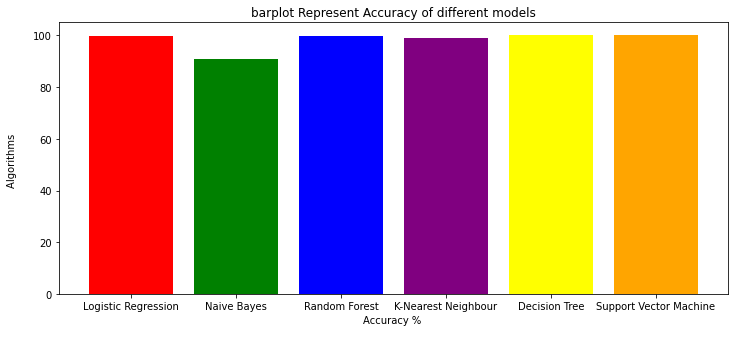

In [55]:
colors = ['red','green','blue','purple','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy % \n")
plt.ylabel("Algorithms \n")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

Max Voting

# ENSEMBLING
>In order to increase the accuracy of the model we use ensembling. Here I use Max Voting technique (BASIC).

Metode max voting umumnya digunakan untuk masalah klasifikasi. Dalam teknik ini, beberapa model digunakan untuk membuat prediksi untuk setiap titik data. Prediksi oleh masing-masing model dianggap sebagai 'suara'. Prediksi yang didapatkan dari sebagian besar model digunakan sebagai prediksi akhir.

In [56]:
m1 = LogisticRegression()
m2 = GaussianNB()
m3 = RandomForestClassifier()
m4 = KNeighborsClassifier()
m5 = DecisionTreeClassifier()
m6 = SVC()

model = VotingClassifier(estimators
    =[('lr', m1), ('nb', m2), ('rf', m3),
      ('knn', m4), ('dt', m5), ('svc', m6)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

# CONCLUSION

1. Serangkaian model yang beragam cenderung membuat keputusan yang lebih baik dibandingkan dengan dengan model tunggal.
2. Data yang paling besar pengaruhnya terhadap harga rata-rata diantaranya adalah price, page 1(main category), page 2(clothing model), location, colour, page.